<h1><center>Titanic Dataset</center></h1>
 

The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark')
%matplotlib inline

In [2]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Survival - Survival (0 = No; 1 = Yes)
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - Sex
- Age - Age
- Sibsp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [4]:
titanic.duplicated().sum()

0

No duplicated records in the dataset

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Age, Cabin and Embarked columns have null values.

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.columns = ['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']

### Survived

In [8]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

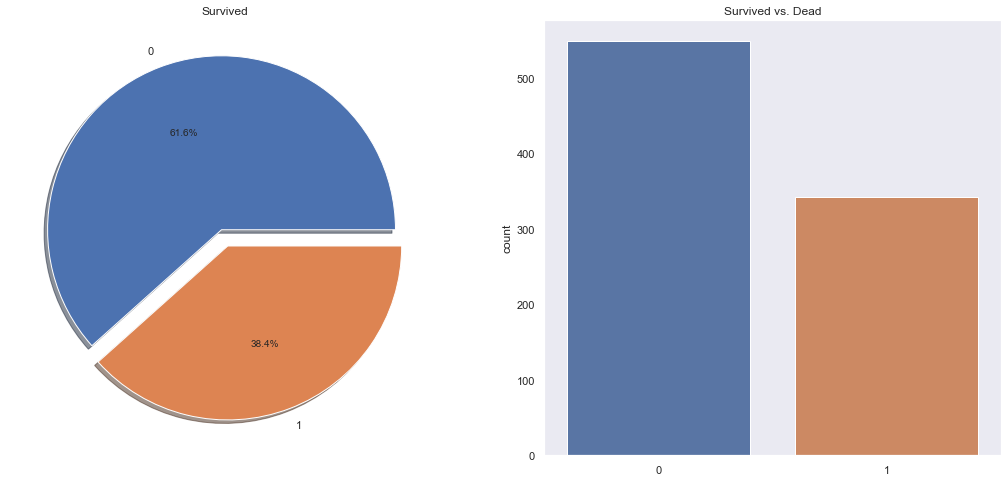

In [9]:
f,ax = plt.subplots(1 ,2, figsize=(18, 8))
titanic['survived'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='survived', data=titanic, ax=ax[1])
ax[1].set_title('Survived vs. Dead')
ax[1].set_xlabel('');

* Out of 891 passengers in the dataset, only 342 survived (38.4% of the passengers) 

### Sex 

In [10]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [11]:
titanic.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

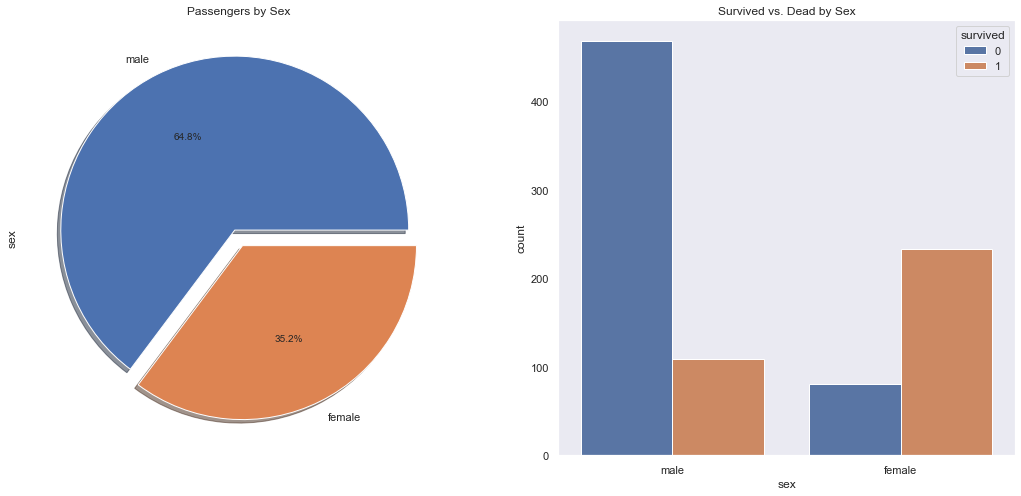

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
titanic['sex'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Passengers by Sex')
sns.countplot(x='sex', hue='survived', data=titanic, ax=ax[1])
ax[1].set_title('Survived vs. Dead by Sex');

* The number of men on the ship was much higher than the number of women
* The number of women rescued was almost twice the number of males rescued 

### Pclass

In [13]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [14]:
titanic.groupby(['pclass', 'survived'])['survived'].count()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

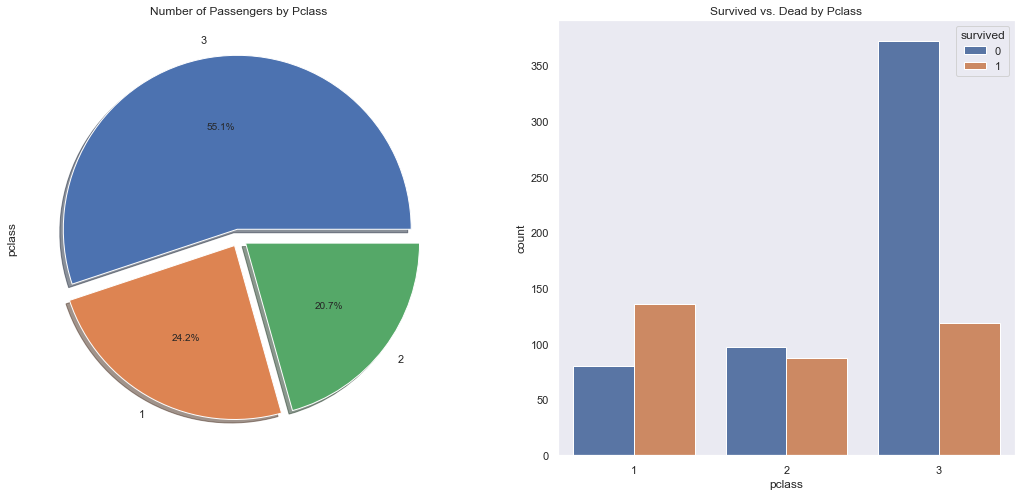

In [15]:
f,ax=plt.subplots(1, 2, figsize=(18,8))
titanic['pclass'].value_counts().plot.pie(explode=[0.05,0.05,0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Number of Passengers by Pclass')
sns.countplot(x='pclass', data=titanic, hue='survived', ax=ax[1])
ax[1].set_title('Survived vs. Dead by Pclass');

* It seems like lower class passengers had a lower chance of survival

### Age

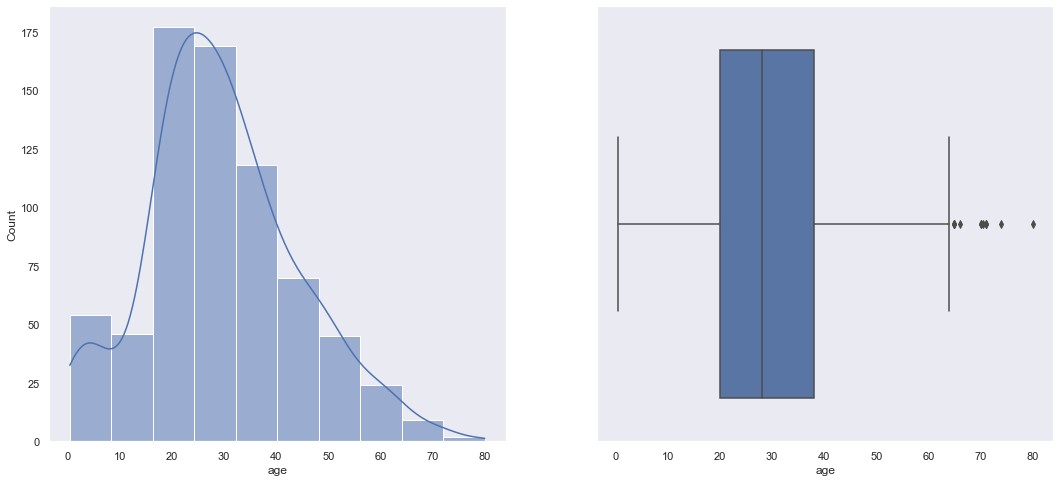

In [16]:
f,ax=plt.subplots(1,2, figsize=(18,8))
sns.histplot(x='age', data=titanic, kde=True, bins=10, ax=ax[0])
sns.boxplot(x='age', data=titanic, ax=ax[1]);

In [17]:
titanic['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

* The average age of the passengers was 30 years
* 75% of the passengers were under 38 years old

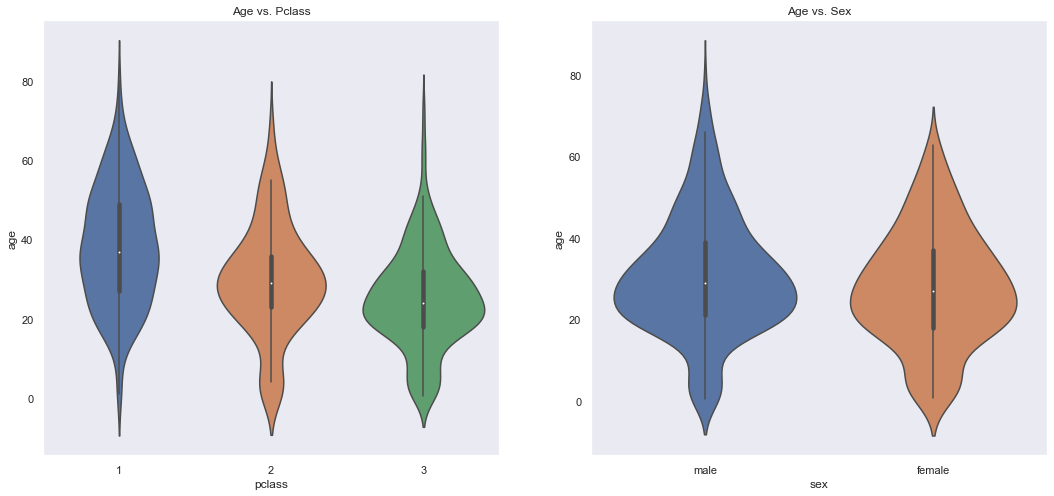

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="pclass", y="age", data=titanic, split=True, ax=ax[0])
ax[0].set_title('Age vs. Pclass')
sns.violinplot(x="sex", y="age", data=titanic, split=True,ax=ax[1])
ax[1].set_title('Age vs. Sex');

* First class passengers belonged more to the middle age groups, with very few children
* The age distribution seems to be less varied in terms of male and female passengers, though we can say that there were more younger females than younger males

### SibSp and Parch

The SibSp attribute refers to the number of siblings or spouses that a passenger had aboard. Parch refers to the number of parents or children someone had on the ship.

Let's create a new column called alone to know if a passenger had someone from his family onboard.

In [19]:
titanic['alone'] = titanic['sibsp'] + titanic['parch']

In [20]:
def alone(x):
    if x>0:
        return "No";
    else:
        return "Yes"
titanic['alone'] = titanic['alone'].apply(alone)

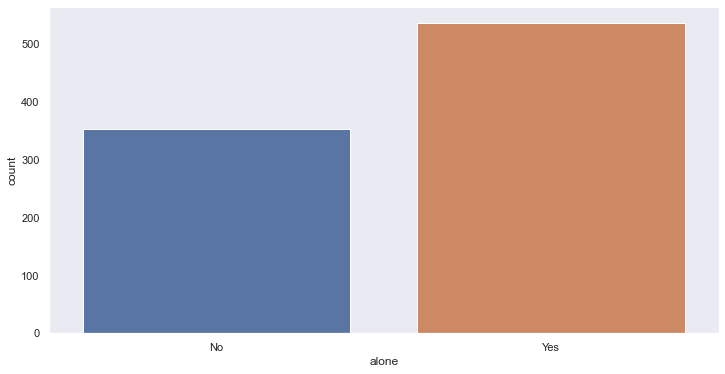

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x='alone', data=titanic);

* The majority of the passengers on the ship were alone

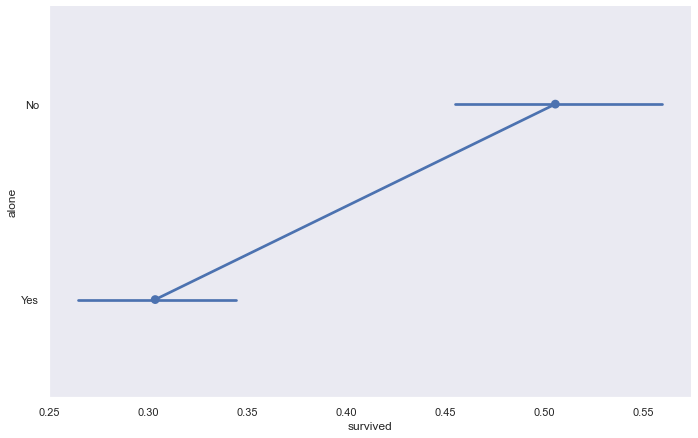

In [22]:
sns.catplot(y="alone", x="survived", kind="point", data=titanic, height=6, aspect=1.6);

* Passengers who were alone had a lower chance of survival

### Embarked

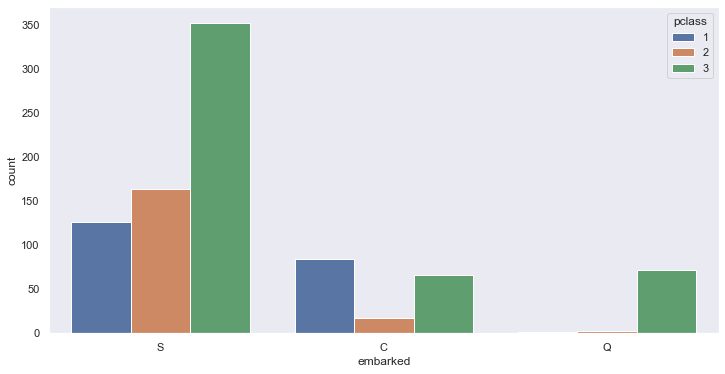

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(x='embarked', data=titanic, hue='pclass');

* Most of the passengers embarked from Southampton
* No first or second class passengers embarked from Queenstown (it might depend on the socio-economic status of the population of Queenstown)

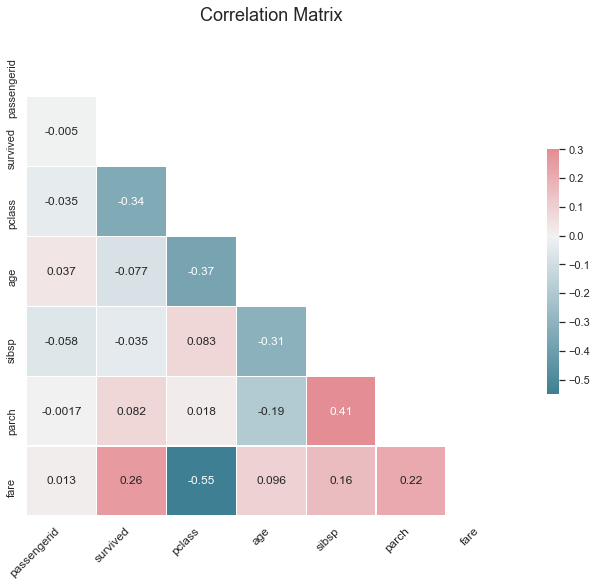

In [24]:
corr = titanic.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set(style="white")
fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium')
ax.set_title('Correlation Matrix', fontsize =18);